<a href="https://colab.research.google.com/github/waynelimads/Capstone/blob/main/Capstone_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
url = 'https://raw.githubusercontent.com/waynelimads/Capstone/main/data/rawdata_new_rev.csv'
df = pd.read_csv(url)
df.describe()

,id,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,lott_1,lott_2,lott_3,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,interviewtime
count,105.000000,102.000000,102.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,102.000000,101.000000,84.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,85.000000,105.000000,85.000000,105.000000,74.000000,105.000000,76.000000,105.000000,61.000000,105.000000,86.000000,105.000000,75.000000,105.000000,93.000000,105.000000,92.000000,105.000000,95.000000,105.000000,89.000000,105.0,79.000000,105.000000,96.000000,21.000000,22.000000,15.000000,25.00000,53.000000,14.000000,55.000000,19.000000,38.000000,72.000000,78.000000,73.000000,26.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,16.0000,59.0,19.000000,21.000000,23.000000,11.000000,1.0,2.000000,8.000000,11.0000

In [4]:
df.head()

,id,date,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,qual_landscape,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,farmtype,region,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,lott_1,lott_2,lott_3,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,interviewtime
0,1,13.03.2019 10:59,4925.0,1.95406,79,3871,107,793,140,0,0,165,0,140,140,0,0,0,3.9250,3.9250,0.0000,0.9973,0.0000,0.00,0.0,0.00,1.0,0.0,Livestock,Kohlfirst/Rhein,62.0,1,4,2,2,2,1,2,2,4,1,4,1,1,4,2,NaN,2,NaN,2,NaN,3,NaN,2,NaN,2,NaN,2,NaN,1,5.0,1,4.0,2,NaN,2,NaN,2,NaN,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,5,1,5,5,1,1,4,4,5,4,5,4,5,1,2,4,3,3,2,6,3,5,4,4,2,2,3,2,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,12,3,0,2,1,5,6,4,3,2,2,2,999.53
1,2,13.03.2019 11:08,2176.0,6.61310,12,1671,0,98,338,119,0,93,0,2088,0,1790,0,338,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.00,1.0,0.0,Arable farming,Kohlfirst/Rhein,53.0,2,5,3,2,2,3,3,3,5,3,3,2,2,2,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,2,NaN,2,NaN,2,1.0,2,4.0,2,NaN,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,5,5,5,5,5,1,5,5,5,3,5,5,5,2,2,3,3,2,5,6,5,5,4,1,1,4,3,2,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# The dataset contains 105 farmers' data with total 227 columns
# Firstly, we will remove unuseful columns including id, date, interview time, and columns with meaningless data (e.g. column 'qual_landscape' only has value 0 )
df_clean = df.drop(['id','date','interviewtime','qual_landscape'], axis=1)
df_clean.head()

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,farmtype,region,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,net_name1_neigh,net_name1_work,net_name1_frien,net_name1_fam,net_name1_part,net_name1_club,net_name1_vet,net_name1_ext,net_name1_oth,net_name2_neigh,net_name2_work,net_name2_frien,net_name2_fam,net_name2_part,net_name2_club,net_name2_vet,net_name2_ext,net_name2_oth,net_name3_neigh,net_name3_work,net_name3_frien,net_name3_fam,net_name3_part,net_name3_club,net_name3_vet,net_name3_ext,net_name3_oth,net_name4_neigh,net_name4_work,net_name4_frien,net_name4_fam,net_name4_part,net_name4_club,net_name4_vet,net_name4_ext,net_name4_oth,net_name5_neigh,net_name5_work,net_name5_frien,net_name5_fam,net_name5_part,net_name5_club,net_name5_vet,net_name5_ext,net_name5_oth,net_name6_neigh,net_name6_work,net_name6_frien,net_name6_fam,net_name6_part,net_name6_club,net_name6_vet,net_name6_ext,net_name6_oth,net_name7_neigh,net_name7_work,net_name7_frien,net_name7_fam,net_name7_part,net_name7_club,net_name7_vet,net_name7_ext,net_name7_oth,net_name8_neigh,net_name8_work,net_name8_frien,net_name8_fam,net_name8_part,net_name8_club,net_name8_vet,net_name8_ext,net_name8_oth,net_name9_neigh,net_name9_work,net_name9_frien,net_name9_fam,net_name9_part,net_name9_club,net_name9_vet,net_name9_ext,net_name9_oth,net_name10_neigh,net_name10_work,net_name10_frien,net_name10_fam,net_name10_part,net_name10_club,net_name10_vet,net_name10_ext,net_name10_oth,net_name1_imp,net_name2_imp,net_name3_imp,net_name4_imp,net_name5_imp,net_name6_imp,net_name7_imp,net_name8_imp,net_name9_imp,net_name10_imp,lott_1,lott_2,lott_3,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul
0,4925.0,1.95406,79,3871,107,793,140,0,0,165,140,140,0,0,0,3.9250,3.9250,0.0000,0.9973,0.0000,0.00,0.0,0.00,1.0,0.0,Livestock,Kohlfirst/Rhein,62.0,1,4,2,2,2,1,2,2,4,1,4,1,1,4,2,NaN,2,NaN,2,NaN,3,NaN,2,NaN,2,NaN,2,NaN,1,5.0,1,4.0,2,NaN,2,NaN,2,NaN,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,5,1,5,5,1,1,4,4,5,4,5,4,5,1,2,4,3,3,2,6,3,5,4,4,2,2,3,2,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,12,3,0,2,1,5,6,4,3,2,2,2
1,2176.0,6.61310,12,1671,0,98,338,119,0,93,2088,0,1790,0,338,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.00,1.0,0.0,Arable farming,Kohlfirst/Rhein,53.0,2,5,3,2,2,3,3,3,5,3,3,2,2,2,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,2,NaN,2,NaN,2,1.0,2,4.0,2,NaN,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,5,5,5,5,5,1,5,5,5,3,5,5,5,2,2,3,3,2,5,6,5,5,4,1,1,4,3,2,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
# We will further trim down the dataset to include only features that are useful for regression analysis and transform network data into more sensible representations.
# Network data (from column 'net_name1_imp' to column 'net_name10_imp') will be reengineered into 'avg_imp' (average score of importance). We will also drop off columns from "net_name1_neigh" to "net_name10_oth"

df_clean['avg_imp'] = df_clean.iloc[:,200:210].mean(axis=1)
col_drop = [*range(110,210)]
df_for_regression = df_clean.drop(df_clean.columns[col_drop],axis=1)


In [7]:
df_for_regression.head()

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,spec_crops,grapes,vegetables,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,farmtype,region,age,educ,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,covman,covman_eff,comp,comp_eff,drag,drag_eff,cov,cov_eff,plough,plough_eff,solar,solar_eff,biog,biog_eff,ecodr,ecodr_eff,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow,innov_pion,innov_early,innov_thorou,innov_others,innov_trad,satisf_ldw,thresh_ldw,satisf_total,thresh_total,share,others_opinions,soc_impr,soc_inc,soc_env,soc_compinc,soc_compenv,lott_1,lott_2,lott_3,agroconcept,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,avg_imp
0,4925.0,1.95406,79,3871,107,793,140,0,0,165,140,140,0,0,0,3.9250,3.9250,0.0000,0.9973,0.0000,0.00,0.0,0.00,1.0,0.0,Livestock,Kohlfirst/Rhein,62.0,1,4,2,2,2,1,2,2,4,1,4,1,1,4,2,NaN,2,NaN,2,NaN,3,NaN,2,NaN,2,NaN,2,NaN,1,5.0,1,4.0,2,NaN,2,NaN,2,NaN,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,5,1,5,5,1,1,4,4,5,4,5,4,5,1,2,4,3,3,2,6,3,5,4,4,2,2,3,2,3,8,12,3,0,2,1,5,6,4,3,2,2,2,1.500000
1,2176.0,6.61310,12,1671,0,98,338,119,0,93,2088,0,1790,0,338,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.00,1.0,0.0,Arable farming,Kohlfirst/Rhein,53.0,2,5,3,2,2,3,3,3,5,3,3,2,2,2,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,2,NaN,2,NaN,2,1.0,2,4.0,2,NaN,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,5,5,5,5,5,1,5,5,5,3,5,5,5,2,2,3,3,2,5,6,5,5,4,1,1,4,3,2,3,1,2,3,0,1,3,4,2,1,6,5,2,2,2.000000
2,2251.0,1.39384,31,1507,279,380,81,0,4,512,81,81,0,0,0,15.9528,15.9028,14.6137,0.0000,0.0000,0.05,0.0,0.05,1.0,0.0,Livestock,Kohlfirst/Rhein,60.0,2,4,2,3,1,1,1,3,4,2,1,2,3,1,2,4.0,2,1.0,2,1.0,1,1.0,2,2.0,2,3.0,2,1.0,2,3.0,2,1.0,2,1.0,2,3.0,2,2.0,1,3.0,1.0,0.0,1.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,2,3,5,5,1,2,2,3,4,4,5,4,3,1,1,4,2,4,4,6,4,4,4,4,2,4,2,5,3,3,9,8,0,3,1,4,2,3,6,5,1,1,2.000000
3,2389.0,1.99523,3,1969,71,322,0,0,27,350,0,0,0,0,0,52.9000,0.0000,0.0000,0.0000,0.0000,52.90,0.0,52.90,1.0,0.0,Livestock,Flaachtal,62.0,2,4,2,2,2,2,2,2,4,3,3,4,4,2,2,3.0,2,3.0,3,4.0,3,2.0,3,2.0,2,3.0,2,2.0,2,2.0,1,4.0,2,2.0,2,4.0,2,4.0,2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,1.0,1.0,4,3,4,1,1,1,2,4,4,4,4,5,3,2,3,3,4,4,5,9,5,7,4,2,1,3,2,1,2,6,9,4,0,1,2,5,4,1,3,6,2,1,2.000000
4,3205.0,3.09942,39,1911,675,461,117,0,14,112,117,0,0,0,117,56.5108,54.9184,40.3041,0.0000,1.3424,0.25,0.0,0.25,1.0,0.0,Livestock,Kohlfirst/Rhein,57.0,1,5,2,3,2,2,1,3,4,1,2,2,2,2,2,3.0,2,3.0,2,3.0,2,1.0,2,1.0,1,3.0,2,1.0,2,1.0,2,1.0,2,1.0,2,3.0,2,2.0,1,3.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,NaN,1,5,5,5,1,1,1,3,4,3,5,5,3,1,2,3,4,1,1,6,3,4,4,3,1,1,3,1,1,7,7,3,0,3,1,6,3,2,5,4,2,2,1.666667


In [8]:
# transform farm type from string to integer value
farmtype_dic={'Arable farming':1, 'Livestock':2, 'Specialized crops':3, 'Others':4, np.nan:np.nan}
df_for_regression['farmtype_value'] = [farmtype_dic[item] for item in df_for_regression['farmtype']]

In [9]:
# We will also delete column "biog" from the dataframe as we observed that the value is universally 2. 
df_for_regression = df_for_regression.drop(['biog','region', 'farmtype'], axis=1)

In [10]:

multicol = df_for_regression.corr()
multicol.style.background_gradient(cmap='coolwarm')

In [11]:
multicol.shape

(122, 122)

In [12]:
np.fill_diagonal(multicol.values, np.nan)
multicol_list = multicol[abs(multicol) >= 0.6].unstack().reset_index()
multicol_list = multicol_list[multicol_list['level_0'].astype(str)!=multicol_list['level_1'].astype(str)]
 
# filtering out lower/upper triangular duplicates 
multicol_list['ordered-cols'] = multicol_list.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
multicol_list = multicol_list.drop_duplicates(['ordered-cols'])
multicol_list.drop(['ordered-cols'], axis=1, inplace=True)
multicol_list = multicol_list.sort_values(kind="quicksort", ascending = False, by=[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
multicol_list.dropna()

,level_0,level_1,0
8251,add_imag,ecodr_imag,1.000000
8617,covman_imag,ecodr_imag,1.000000
2462,pigs_poultry,poultry,0.998405
132,workforce,spec_crops,0.980897
866,prot_cult,vegetables,0.974378
134,workforce,vegetables,0.961988
1232,spec_crops,vegetables,0.961887
746,perm_crops,oth_spec_crops,0.954915
864,prot_cult,spec_crops,0.928609
1846,animal_unit,cattle_animal_unit,0.928419


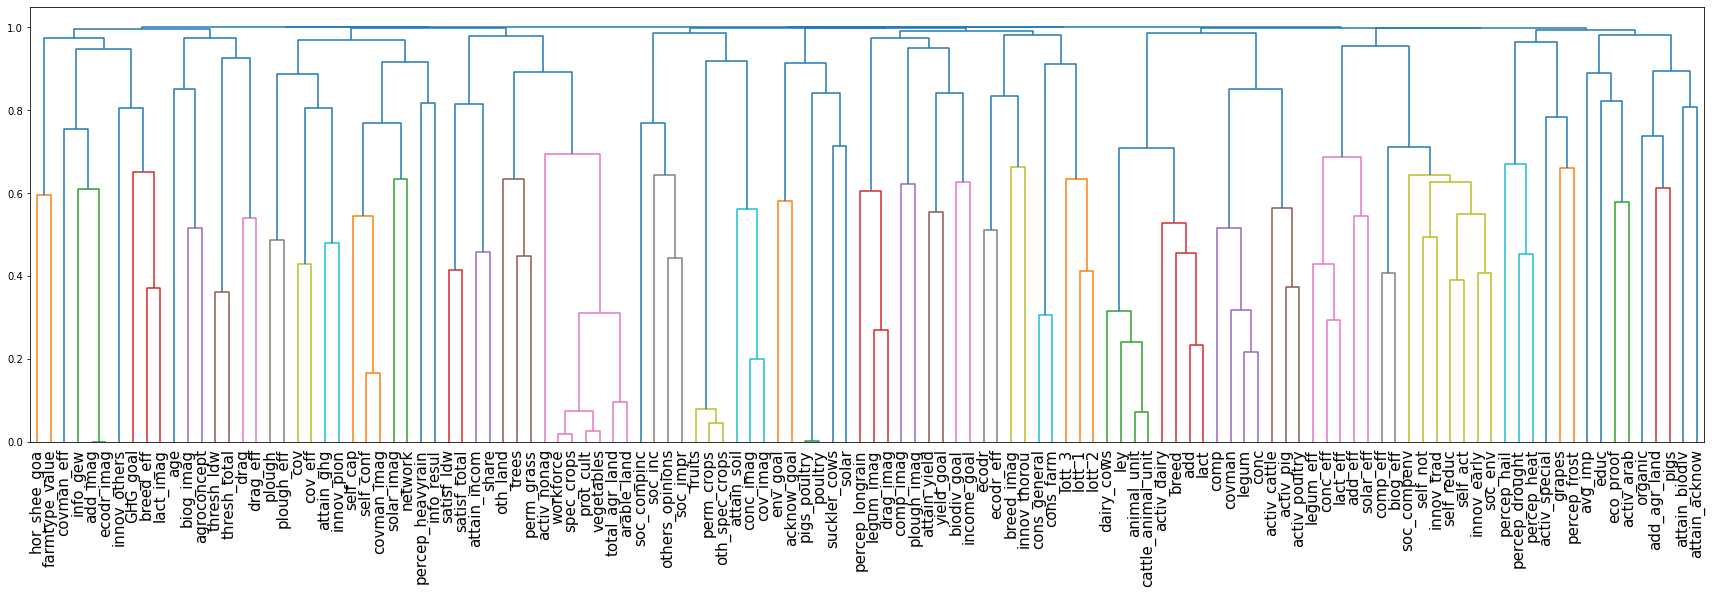

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
multicol = df_for_regression.corr()
multicol = np.nan_to_num(multicol)
plt.figure(figsize=(30,8))
dissimilarity = 1 - abs(multicol)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=df_for_regression.columns, orientation='top', 
           leaf_rotation=90);
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)

In [15]:
import seaborn as sns
sns.set(font_scale=1.4)
g = sns.clustermap(multicol, method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 15}, vmin=-1, vmax=1, figsize=(150,120))

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [16]:
# From the above table, we can see there are many pairs of variables having a correlation higher than 0.8.
# We will need to re-engineer the features to remove highly correlated variables or group them into one variable

In [17]:
#e.g. size_of_farm (large, medium, small), type_of_farm (see below, can also be visualized), 

In [18]:
# To cut the dataframe down to include only independent variables (i.e. excluding dependent vairables, in our case, the columns pertaining to mitigation actions being taken and mitigation actions to be taken)
df_for_regression.head()
df_ind_only = df_for_regression.drop(['legum','legum_eff','conc','conc_eff','add','add_eff','lact','lact_eff','breed','breed_eff','covman','covman_eff','comp','comp_eff','drag','drag_eff','cov','cov_eff','plough','plough_eff','solar','solar_eff','biog_eff','ecodr','ecodr_eff',
                                      'legum_imag','conc_imag','add_imag','lact_imag','breed_imag','covman_imag','comp_imag','drag_imag','cov_imag','plough_imag','solar_imag','biog_imag','ecodr_imag'],
                                     axis=1)
df_ind_only.head()

In [ ]:
multicol_ind = df_ind_only.corr()
multicol_ind = np.nan_to_num(multicol_ind)
plt.figure(figsize=(30,20))
dissimilarity = 1 - abs(multicol_ind)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=df_ind_only.columns, orientation='top', 
           leaf_rotation=90);
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)

In [ ]:
multicol_ind = df_ind_only.corr()
#multicol_ind = np.nan_to_num(multicol_ind)
sns.set(font_scale=1.4)
g = sns.clustermap(multicol_ind, method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 15}, vmin=-1, vmax=1, figsize=(150,120), yticklabels=True)

In [ ]:
multicol_ind = df_ind_only.corr()
np.fill_diagonal(multicol_ind.values, np.nan)
multicol_ind_list = multicol_ind[abs(multicol_ind) >= 0.6].unstack().reset_index()
multicol_ind_list = multicol_ind_list[multicol_ind_list['level_0'].astype(str)!=multicol_ind_list['level_1'].astype(str)]
 
# filtering out lower/upper triangular duplicates 
multicol_ind_list['ordered-cols'] = multicol_ind_list.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
multicol_ind_list = multicol_ind_list.drop_duplicates(['ordered-cols'])
multicol_ind_list.drop(['ordered-cols'], axis=1, inplace=True)
multicol_ind_list = multicol_ind_list.sort_values(kind="quicksort", ascending = False, by=[0])
multicol_ind_list.dropna()

In [ ]:
# Cut off to be 0.6
# Below clusters of features are identified
group_1 = ['diary_cows', 'ley', 'animal_unit', 'cattle_animal_unit']
group_2 = ['fruits', 'perm_crops', 'oth_spec_crops']
group_3 = ['prot_cult', 'vegetables', 'workforce', 'spec_crops', 'total_agr_land', 'arable_land']
group_4 = ['pigs_poultry','poultry']
group_5 = ['cons_general','cons_farm']
group_6 = ['thresh_ldw','thresh_total']
group_7 = ['activ_pig','activ_poultry']

In [ ]:
# There are four types of farm. 
# Arable farming = Farm mainly produces arable crops
# Livestock = Farm mainly produces livestock
# Specialized Crops = Farm mainly produces specialized crops 
# Others = Farm mainly produces other products  